# FINAL CAPSTONE PROJECT-COURSERA- BATTLE OF NEIGHBOURHOODS




 Submitted by 
 # SREEKAND BOSE

Introduction


The project deals with upcoming restaurants and the search of an upcoming restaurant location in the proximities of London. As London is a mix of various culture like asian,african and other european nationals there is a wide variety of food points everywhere.
As if there are various cuisines in every nook and corner ,we can still check if there are enough Indian restaurants which are focused on north indian, south indian ,east indian,kashmiri and chinese mixed dishes. 



PROBLEM 


A large group of south indians are residing in London and they find it difficult to dinein in to a restaurent of their taste.so through this project we can help them to identify a proper location to setup a new restaurant based on their current amenities.
Our data from Four square helps a lot to identify an affordable and convenient location where other restaurants are not a hindrance for their growth while taking the business on a long term vision. 


Target Audience


The most targeted audiences are the South indians who resides in the downtown of London. As their need is to setup a diverse restaurant with wide variety of menu including european style mix with chinese and other asian dishes the audiences become more broader and the data driven can help most of the people who wants to start a restaurant or food corner.


In [24]:
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [48]:
# import necessary packages
import numpy as np
import pandas as pd 
import json
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import folium # map rendering library
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


In [37]:
neighborhood_latitude=1.2792655
neighborhood_longitude=103.8480938

In [49]:
# @hidden_cell
CLIENT_ID = 'XE1AJ0KBZXSM3DXHHXMTMY5J35EMDYCXCML52RNM2T2WCQ3R' # your Foursquare ID
CLIENT_SECRET = 'KSNKP5J0F35BA05XX1RFPQZMRVYWMFSOR3SGJ2GOBZRCJY5J' # your Foursquare Secret
VERSION = '20200418' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [75]:
# library for BeautifulSoup
from bs4 import BeautifulSoup

# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy
# conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('matplotlib imported...')

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')

# install the Geocoder
!pip -q install geocoder
import geocoder

# import time
import time
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')
print('...Done')


numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...
...Done


In [76]:

wikipedia_link = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
wikipedia_page = requests.get(wikipedia_link, headers = headers)
wikipedia_page

<Response [200]>

In [77]:
# Cleans html file
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')
# This extracts the "tbody" within the table where class is "wikitable sortable"
table = soup.find('table', {'class':'wikitable sortable'}).tbody


In [78]:
# Extracts all "tr" (table rows) within the table above
rows = table.find_all('tr')

In [79]:
# Extracts the column headers, removes and replaces possible '\n' with space for the "th" tag
columns = [i.text.replace('\n', '')
           for i in rows[0].find_all('th')]

In [80]:
# Converts columns to pd dataframe
df = pd.DataFrame(columns = columns)
df

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref


In [81]:
# Extracts every row with corresponding columns
# Then appends the values to the create pd dataframe "df"
# Please note that the first row (row[0]) is skipped because it is already the header
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    
    if len(tds) == 7:
        values = [tds[0].text, tds[1].text, tds[2].text.replace('\n', ''.replace('\xa0','')), tds[3].text, tds[4].text.replace('\n', ''.replace('\xa0','')), tds[5].text.replace('\n', ''.replace('\xa0','')), tds[6].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df = df.append(pd.Series(values, index = columns), ignore_index = True)

        df

In [82]:
df.head(5)

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [83]:
df = df.rename(index=str, columns = {'Location': 'Location', 'London\xa0borough': 'Borough', 'Post town': 'Post-town', 'Postcode\xa0district': 'Postcode', 'Dial\xa0code': 'Dial-code', 'OS grid ref': 'OSGridRef'})

In [84]:
df.head(5)

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [85]:
df['Borough'] = df['Borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))

In [86]:

df.shape

(533, 6)

In [87]:
df.head(5)

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [88]:
df0 = df.drop('Postcode', axis=1).join(df['Postcode'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Postcode'))

In [89]:
df0.head(5)

,Location,Borough,Post-town,Dial-code,OSGridRef,Postcode
0,Abbey Wood,"Bexley, Greenwich",LONDON,020,TQ465785,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W3
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W4
10,Angel,Islington,LONDON,020,TQ345665,EC1
10,Angel,Islington,LONDON,020,TQ345665,N1


In [90]:
df0.shape

(637, 6)

In [91]:
df1 = df0[['Location', 'Borough', 'Postcode', 'Post-town']].reset_index(drop=True)

In [92]:
df1.head(5)

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [93]:

df1.shape

(637, 4)

In [94]:
df2 = df1
df21 = df2[df2['Post-town'].str.contains('LONDON')]

In [95]:
df21.head(5)

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [96]:
df21.shape

(381, 4)

In [97]:
# Re-assigns the df21 to new dataframe without the Post-town
df3 = df21[['Location', 'Borough', 'Postcode']].reset_index(drop=True)

In [98]:
df3.head(10)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1
5,Church End,Brent,NW10
6,Church End,Barnet,N3
7,Clapham,"Lambeth, Wandsworth",SW4
8,Clerkenwell,Islington,EC1
9,Colindale,Barnet,NW9


In [99]:
df_london = df3
df_london.to_csv('LondonLocations.csv', index = False)

In [100]:
df_london.head(5)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [101]:
df_london.Postcode = df_london.Postcode.str.strip()

In [102]:
df_london.head(5)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [103]:
# New dataframe for South East London postcodes - df_se
df_se = df_london[df_london['Postcode'].str.startswith(('SE'))].reset_index(drop=True)

In [104]:
df_se.head(10)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Crofton Park,Lewisham,SE4
2,Crossness,Bexley,SE2
3,Crystal Palace,Bromley,SE19
4,Crystal Palace,Bromley,SE20
5,Crystal Palace,Bromley,SE26
6,Denmark Hill,Southwark,SE5
7,Deptford,Lewisham,SE8
8,Dulwich,Southwark,SE21
9,East Dulwich,Southwark,SE22


In [105]:
demograph_link = 'https://en.wikipedia.org/wiki/Demography_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
demograph_page = requests.get(demograph_link, headers = headers)
soup1 = BeautifulSoup(demograph_page.content, 'html.parser')
table1 = soup1.find('table', {'class':'wikitable sortable'}).tbody
rows1 = table1.find_all('tr')
columns1 = [i.text.replace('\n', '')
           for i in rows1[0].find_all('th')]


In [106]:
columns1

['Local authority', 'White', 'Mixed', 'Asian', 'Black', 'Other']

In [107]:
demo_london = pd.DataFrame(columns = columns1)

In [108]:
demo_london.head(5)

,Local authority,White,Mixed,Asian,Black,Other


In [109]:

for j in range(1, len(rows1)):
    tds1 = rows1[j].find_all('td')
    if len(tds1) == 7:
        values1 = [tds1[0].text, tds1[1].text, tds1[2].text.replace('\n', ''.replace('\xa0','')), tds1[3].text, tds1[4].text.replace('\n', ''.replace('\xa0','')), tds1[5].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values1 = [td1.text.replace('\n', '').replace('\xa0','') for td1 in tds1]
        
        demo_london = demo_london.append(pd.Series(values1, index = columns1), ignore_index = True)

        demo_london

In [110]:
demo_london['Black'] = demo_london['Black'].astype('float')

In [111]:
demo_london_sorted = demo_london.sort_values(by='Black', ascending = False)

In [112]:
demo_london_sorted.head(5)

,Local authority,White,Mixed,Asian,Black,Other
22,Lewisham,53.5,7.4,9.3,27.2,2.6
27,Southwark,54.3,6.2,9.4,26.9,3.3
21,Lambeth,57.1,7.6,6.9,25.9,2.4
11,Hackney,54.7,6.4,10.5,23.1,5.3
7,Croydon,55.1,6.6,16.4,20.2,1.8


In [113]:
df_se

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Crofton Park,Lewisham,SE4
2,Crossness,Bexley,SE2
3,Crystal Palace,Bromley,SE19
4,Crystal Palace,Bromley,SE20
5,Crystal Palace,Bromley,SE26
6,Denmark Hill,Southwark,SE5
7,Deptford,Lewisham,SE8
8,Dulwich,Southwark,SE21
9,East Dulwich,Southwark,SE22


In [114]:
df_se_top = df_se[df_se['Borough'].isin(['Lewisham', 'Southwark', 'Lambeth', 'Hackney', 'Croydon'])].reset_index(drop=True)

In [115]:
df_se_top.head(5)

,Location,Borough,Postcode
0,Crofton Park,Lewisham,SE4
1,Denmark Hill,Southwark,SE5
2,Deptford,Lewisham,SE8
3,Dulwich,Southwark,SE21
4,East Dulwich,Southwark,SE22


In [116]:
df_se_top.shape

(46, 3)

In [117]:
df_se.shape

(80, 3)

In [118]:
# Geocoder starts here
# Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Geocoder ends here

In [119]:
sample = get_latlng('SE2')
sample

[51.492450000000076, 0.12127000000003818]

In [124]:
gg = geocoder.geocodefarm(sample, method = 'reverse')
gg

<[FAILED, NO_RESULTS] Geocodefarm - Reverse [empty]>

In [122]:
start = time.time()

postal_codes = df_se_top['Postcode']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]

end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  23.524272441864014 seconds


In [125]:
df_se_loc = df_se_top

# The obtained coordinates (latitude and longitude) are joined with the dataframe as shown
df_se_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_se_loc['Latitude'] = df_se_coordinates['Latitude']
df_se_loc['Longitude'] = df_se_coordinates['Longitude']


In [126]:
df_se_loc.head(5)

,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467
3,Dulwich,Southwark,SE21,51.44100,-0.08897
4,East Dulwich,Southwark,SE22,51.45256,-0.07076


In [127]:
df_se_loc.to_csv('SELondonLocationsCoordinates.csv', index = False)

In [128]:
df_se_loc.shape

(46, 5)

In [130]:
# @hidden_cell
CLIENT_ID = 'XE1AJ0KBZXSM3DXHHXMTMY5J35EMDYCXCML52RNM2T2WCQ3R' # your Foursquare ID
CLIENT_SECRET = 'KSNKP5J0F35BA05XX1RFPQZMRVYWMFSOR3SGJ2GOBZRCJY5J' # your Foursquare Secret
VERSION = '20200418' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [131]:
import json
filename = 'fsquarecredential.json'
with open(filename) as f:
    data = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'fsquarecredential.json'

In [132]:
# Resets the current index to a new
se_df = df_se_loc.reset_index().drop('index', axis = 1)

In [133]:
se_df.shape

(46, 5)

In [134]:
se_df

,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467
3,Dulwich,Southwark,SE21,51.44100,-0.08897
4,East Dulwich,Southwark,SE22,51.45256,-0.07076
5,Elephant and Castle,Southwark,SE1,51.49996,-0.09568
6,Elephant and Castle,Southwark,SE11,51.49084,-0.11108
7,Elephant and Castle,Southwark,SE17,51.48764,-0.09542
8,Bankside,Southwark,SE1,51.49996,-0.09568
9,Forest Hill,Lewisham,SE23,51.44122,-0.04764


In [135]:
se_df.loc[se_df['Location'] == 'Lewisham']

,Location,Borough,Postcode,Latitude,Longitude
20,Lewisham,Lewisham,SE13,51.46196,-0.00754


In [136]:
se_df.loc[20, 'Location']

'Lewisham'

In [137]:
lewisham_lat = se_df.loc[20, 'Latitude']
lewisham_long = se_df.loc[20, 'Longitude']
lewisham_loc = se_df.loc[20, 'Location']
lewisham_postcode = se_df.loc[20, 'Postcode']

print('The latitude and longitude values of {} with postcode {}, are {}, {}.'.format(lewisham_loc,
                                                                                         lewisham_postcode,
                                                                                         lewisham_lat,
                                                                                         lewisham_long))

The latitude and longitude values of Lewisham with postcode SE13, are 51.46196000000003, -0.007539999999949032.


In [138]:
# Credentials are provided already for this part
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lewisham_lat, 
    lewisham_long, 
    radius, 
    LIMIT)

# displays URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=XE1AJ0KBZXSM3DXHHXMTMY5J35EMDYCXCML52RNM2T2WCQ3R&client_secret=KSNKP5J0F35BA05XX1RFPQZMRVYWMFSOR3SGJ2GOBZRCJY5J&v=20200418&ll=51.46196000000003,-0.007539999999949032&radius=2000&limit=100'

In [139]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9b425d47e0d60028c95062'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Lewisham Central',
  'headerFullLocation': 'Lewisham Central, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 191,
  'suggestedBounds': {'ne': {'lat': 51.47996001800005,
    'lng': 0.021296961190459426},
   'sw': {'lat': 51.44395998200002, 'lng': -0.03637696119035749}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '535823bc498ec8d8da9aad5f',
       'name': 'Street Feast Model Market',
       'location': {'address': '196 Lewisham High St',
        'crossStreet': 'entrance at Molesworth St',
        'lat': 51.46020945743763,
        'lng': -0.01

In [140]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [141]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [142]:
nearby_venues

,name,categories,lat,lng
0,Street Feast Model Market,Street Food Gathering,51.460209,-0.012199
1,Maggie's Kitchen,Café,51.465380,-0.011213
2,Levante restaurant,Restaurant,51.462072,-0.009491
3,Levante Pide Restaurant,Turkish Restaurant,51.459848,-0.011476
4,Corte,Coffee Shop,51.459776,-0.011554
5,Manor House Gardens,Park,51.456686,0.004684
6,Dirty South,Pub,51.458846,-0.002666
7,Côte Brasserie,French Restaurant,51.467378,0.007176
8,Blackheath Farmers' Market,Farmers Market,51.465913,0.007945
9,Gennaro Delicatessan,Deli / Bodega,51.461765,-0.009726


In [143]:
nearby_venues_lewisham_unique = nearby_venues['categories'].value_counts().to_frame(name='Count')

In [144]:
nearby_venues_lewisham_unique.head(20)

,Count
Pub,13
Café,8
Gastropub,7
Park,5
Garden,4
Fish & Chips Shop,3
Restaurant,3
Coffee Shop,3
Food Truck,3
Supermarket,2


In [145]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [146]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [147]:
se_venues = getNearbyVenues(names=se_df['Location'],
                                   latitudes=se_df['Latitude'],
                                   longitudes=se_df['Longitude']
                                  )

Crofton Park
Denmark Hill
Deptford
Dulwich
East Dulwich
Elephant and Castle
Elephant and Castle
Elephant and Castle
Bankside
Forest Hill
Gipsy Hill
Gipsy Hill
Grove Park
Herne Hill
Hither Green
Honor Oak
Ladywell
Ladywell
Lambeth
Lee
Lewisham
New Cross
Newington
Newington
Nunhead
Oval
Bellingham
Peckham
Rotherhithe
Selhurst
Bermondsey
South Norwood
Southend
St Johns
Surrey Quays
Tulse Hill
Tulse Hill
Upper Norwood
Walworth
Blackheath
West Norwood
Brixton
Brockley
Camberwell
Catford
Chinbrook


In [148]:
se_venues.shape

(4238, 7)

In [149]:
len(se_venues)

4238

In [150]:
se_venues['Neighbourhood'].value_counts()
se_venues.to_csv('se_venues.csv')

In [151]:
se_venues.head(20)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Crofton Park,51.46268,-0.03558,The Orchard,51.463678,-0.035699,Gastropub
1,Crofton Park,51.46268,-0.03558,Brockley's Rock,51.459457,-0.033868,Fish & Chips Shop
2,Crofton Park,51.46268,-0.03558,Browns Of Brockley,51.464513,-0.037346,Coffee Shop
3,Crofton Park,51.46268,-0.03558,Waterintobeer,51.463712,-0.038826,Beer Store
4,Crofton Park,51.46268,-0.03558,Saka Maka,51.464826,-0.036437,Indian Restaurant
5,Crofton Park,51.46268,-0.03558,Masala Wala,51.465652,-0.036007,Pakistani Restaurant
6,Crofton Park,51.46268,-0.03558,Salthouse Bottles,51.463916,-0.036618,Beer Store
7,Crofton Park,51.46268,-0.03558,The Gantry,51.463597,-0.036127,Gastropub
8,Crofton Park,51.46268,-0.03558,Brockley Brewery (The Brockley Brewing Company),51.462265,-0.036132,Brewery
9,Crofton Park,51.46268,-0.03558,Hilly Fields,51.460010,-0.025599,Park


In [152]:
se_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Bankside,100,100,100,100,100,100
Bellingham,73,73,73,73,73,73
Bermondsey,100,100,100,100,100,100
Blackheath,93,93,93,93,93,93
Brixton,100,100,100,100,100,100
Brockley,100,100,100,100,100,100
Camberwell,100,100,100,100,100,100
Catford,73,73,73,73,73,73
Chinbrook,55,55,55,55,55,55


In [153]:
print('There are {} uniques categories.'.format(len(se_venues['Venue Category'].unique())))

There are 195 uniques categories.


In [154]:
se_venue_unique_count = se_venues['Venue Category'].value_counts().to_frame(name='Count')

In [155]:
se_venue_unique_count.head(20)

,Count
Pub,395
Coffee Shop,286
Café,263
Park,223
Grocery Store,177
Italian Restaurant,138
Pizza Place,87
Bar,83
Hotel,81
Cocktail Bar,79


In [156]:
se_venue_unique_count.describe()

,Count
count,195.000000
mean,21.733333
std,46.413767
min,1.000000
25%,4.000000
50%,8.000000
75%,20.000000
max,395.000000


In [157]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [158]:
# df_london_coordinates
map_london = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_london

In [159]:
# Adding markers to map
for lat, lng, borough, loc in zip(se_df['Latitude'], 
                                  se_df['Longitude'],
                                  se_df['Borough'],
                                  se_df['Location']):
    label = '{} - {}'.format(loc, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
display(map_london)


In [160]:
type(se_df)

pandas.core.frame.DataFrame

In [161]:
se_onehot = pd.get_dummies(se_venues[['Venue Category']], prefix = "", prefix_sep = "")

In [162]:
se_onehot['Neighbourhood'] = se_venues['Neighbourhood']

In [163]:
fixed_columns = [se_onehot.columns[-1]] + list(se_onehot.columns[:-1])
se_onehot = se_onehot[fixed_columns]

In [164]:
se_onehot.head(20)

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Roof Deck,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [165]:
se_onehot.loc[se_onehot['African Restaurant'] != 0]

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Roof Deck,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
137,Denmark Hill,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
614,Elephant and Castle,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
698,Elephant and Castle,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [166]:
se_onehot.loc[se_onehot['Neighbourhood'] == 'Lewisham']

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Roof Deck,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
1867,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1868,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1869,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [167]:
se_onehot.to_csv('selondon_onehot.csv', index = False)

In [168]:
se_onehot.shape

(4238, 196)

In [169]:
se_grouped = se_onehot.groupby('Neighbourhood').mean().reset_index()
se_grouped.head()

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Roof Deck,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Bankside,0.00,0.000000,0.0,0.0,0.000000,0.01,0.02,0.0,0.0,0.0,0.0,0.0,0.020000,0.010000,0.03,0.0,0.00,0.01,0.0,0.0,0.0,0.000000,0.01,0.000000,0.00,0.000000,0.010000,0.00,0.01,0.000000,0.0,0.000000,0.030000,0.060000,0.00,0.000000,0.01,0.00,0.00,0.01,0.010000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.01,0.01,0.01,0.00,0.0,0.00,0.0,0.010000,0.000000,0.00,0.0,0.0,0.0,0.01,0.00,0.01,0.0,0.0,0.010000,0.0,0.0,0.000000,0.00,0.010000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.040000,0.010000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.01,0.0,0.080000,0.0,0.000000,0.0,0.010000,0.01,0.01,0.000000,0.000000,0.040000,0.000000,0.0,0.0,0.00,0.01,0.0,0.0,0.0,0.0,0.00,0.01,0.0,0.00,0.0,0.01,0.0,0.01,0.01,0.0,0.01,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.020000,0.02,0.0,0.01,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.040000,0.0,0.00,0.00,0.000000,0.000000,0.01,0.000000,0.0,0.0,0.010000,0.06,0.0,0.02,0.01,0.000000,0.000000,0.01,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.01,0.03,0.000000,0.0,0.0,0.020000,0.010000,0.070000,0.0,0.0,0.000000,0.0,0.0,0.01,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.010000,0.0,0.00,0.00,0.000000
1,Belling

In [170]:
print("Before One-hot encoding:", se_df.shape)
print("After One-hot encoding:", se_grouped.shape)

Before One-hot encoding: (46, 5)
After One-hot encoding: (40, 196)


In [171]:
se_grouped.to_csv('london_grouped.csv', index = False)

In [172]:
num_top_venues = 100 # Top common venues needed

for hood in se_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = se_grouped[se_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Bankside----
                            venue  freq
0                           Hotel  0.08
1                         Theater  0.07
2                  Scenic Lookout  0.06
3                     Coffee Shop  0.06
4                             Pub  0.04
5                   Grocery Store  0.04
6              Italian Restaurant  0.04
7                        Beer Bar  0.03
8           Street Food Gathering  0.03
9                    Cocktail Bar  0.03
10                    Pizza Place  0.02
11               Tapas Restaurant  0.02
12          Performing Arts Venue  0.02
13                           Park  0.02
14                         Bakery  0.02
15             Seafood Restaurant  0.02
16                     Art Museum  0.02
17                      Roof Deck  0.01
18       Mediterranean Restaurant  0.01
19                     Shoe Store  0.01
20                 Sandwich Place  0.01
21              Food & Drink Shop  0.01
22             English Restaurant  0.01
23            Empanada 

In [173]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [174]:
num_top_venues = 100

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = se_grouped['Neighbourhood']

for ind in np.arange(se_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(se_grouped.iloc[ind, :], num_top_venues)

In [175]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue,51th Most Common Venue,52th Most Common Venue,53th Most Common Venue,54th Most Common Venue,55th Most Common Venue,56th Most Common Venue,57th Most Common Venue,58th Most Common Venue,59th Most Common Venue,60th Most Common Venue,61th Most Common Venue,62th Most Common Venue,63th Most Common Venue,64th Most Common Venue,65th Most Common Venue,66th Most Common Venue,67th Most Common Venue,68th Most Common Venue,69th Most Common Venue,70th Most Common Venue,71th Most Common Venue,72th Most Common Venue,73th Most Common Venue,74th Most Common Venue,75th Most Common Venue,76th Most Common Venue,77th Most Common Venue,78th Most Common Venue,79th Most Common Venue,80th Most Common Venue,81th Most Common Venue,82th Most Common Venue,83th Most Common Venue,84th Most Common Venue,85th Most Common Venue,86th Most Common Venue,87th Most Common Venue,88th Most Common Venue,89th Most Common Venue,90th Most Common Venue,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
0,Bankside,Hotel,Theater,Scenic Lookout,Coffee Shop,Grocery Store,Pub,Italian Restaurant,Cocktail Bar,Street Food Gathering,Beer Bar,Bakery,Seafood Restaurant,Pizza Place,Performing Arts Venue,Park,Tapas Restaurant,Art Museum,Mediterranean Restaurant,French Restaurant,Gym,History Museum,Garden,Indie Movie Theater,Portuguese Restaurant,Convenience Store,Cupcake Shop,Peruvian Restaurant,Indie Theater,Eastern European Restaurant,Korean Restaurant,Empanada Restaurant,English Restaurant,Music Venue,Food Stand,Museum,Movie Theater,Modern European Restaurant,Roof Deck,Farmers Market,Food & Drink Shop,Indian Restaurant,Dance Studio,Bar,Shoe Store,Brewery,Trail,Street Art,Wine Bar,Skate Park,Café,Bike Shop,Sandwich Place,Thai Restaurant,Cheese Shop,Art Gallery,Flower Shop,BBQ Joint,Australian Restaurant,Arts & Crafts Store,Flea Market,Food Court,Fish Market,Food Truck,Athletics & Sports,Forest,Asian Restaurant,Chinese Restaurant,Fried Chicken Joint,Fish & Chips Shop,Furniture / Home Store,Gaming Cafe,Argentinian Restaurant,Aquarium,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Antique Shop,American Restaurant,Fruit & Vegetable Store,Beer Garden,Fast Food Restaurant,Farm,Clothing Store,Caribbean Restaurant,Community Center,Concert Hall,Bus Stop,Creperie,Cricket Ground,Golf Course,Burger Joint,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Building,Diner,Breakfast Spot
1,Bellingham,Grocery Store,Park,Supermarket,Pub,Café,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Hardware Store,Gas Station,Train Station,Indian Restaurant,Cocktail Bar,Sandwich Place,Clothing Store,Dance Studio,Chinese Restaurant,Shopping Mall,Portuguese Restaurant,Pet Stor

In [176]:
neighbourhoods_venues_sorted.to_csv('neighbourhoods_venues_sorted.csv', index = False)

In [177]:
se_grouped_clustering = se_grouped.drop('Neighbourhood', 1)

In [178]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(se_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 4, 3, 1, 2, 1, 2, 4, 4, 1], dtype=int32)

In [179]:
kmeans.labels_[0:10]

array([3, 4, 3, 1, 2, 1, 2, 4, 4, 1], dtype=int32)

In [180]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [181]:
se_merged = se_df

In [182]:
se_merged.head(3)

,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467


In [183]:
se_merged_latlong = se_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on = 'Location')

In [184]:
se_merged_latlong.head(20)

,Location,Borough,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue,51th Most Common Venue,52th Most Common Venue,53th Most Common Venue,54th Most Common Venue,55th Most Common Venue,56th Most Common Venue,57th Most Common Venue,58th Most Common Venue,59th Most Common Venue,60th Most Common Venue,61th Most Common Venue,62th Most Common Venue,63th Most Common Venue,64th Most Common Venue,65th Most Common Venue,66th Most Common Venue,67th Most Common Venue,68th Most Common Venue,69th Most Common Venue,70th Most Common Venue,71th Most Common Venue,72th Most Common Venue,73th Most Common Venue,74th Most Common Venue,75th Most Common Venue,76th Most Common Venue,77th Most Common Venue,78th Most Common Venue,79th Most Common Venue,80th Most Common Venue,81th Most Common Venue,82th Most Common Venue,83th Most Common Venue,84th Most Common Venue,85th Most Common Venue,86th Most Common Venue,87th Most Common Venue,88th Most Common Venue,89th Most Common Venue,90th Most Common Venue,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558,1,Coffee Shop,Pub,Café,Park,Bar,Gastropub,Italian Restaurant,Cocktail Bar,Indian Restaurant,Turkish Restaurant,Food Truck,Brewery,Fish & Chips Shop,Bakery,Restaurant,Hotel,Beer Store,Gym / Fitness Center,Supermarket,Pizza Place,Sandwich Place,Grocery Store,Gourmet Shop,Concert Hall,Performing Arts Venue,Pet Store,Garden Center,Hungarian Restaurant,Pakistani Restaurant,Farmers Market,Indie Movie Theater,Mediterranean Restaurant,Malay Restaurant,French Restaurant,Scenic Lookout,Deli / Bodega,Vegetarian / Vegan Restaurant,Breakfast Spot,Athletics & Sports,Train Station,Street Food Gathering,Sri Lankan Restaurant,Speakeasy,Theater,Burger Joint,Go Kart Track,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Australian Restaurant,Food Court,American Restaurant,Food Stand,Asian Restaurant,Forest,Greek Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Golf Course,Gaming Cafe,Arts & Crafts Store,Garden,BBQ Joint,Gas Station,Art Museum,Art Gallery,Gay Bar,Antique Shop,General Entertainment,Argentinian Restaurant,Aquarium,Gift Shop,Caribbean Restaurant,Falafel Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Chinese Restaurant,Bus Stop,Climbing Gym,Clothing Store,Building,Community Center,Brazilian Restaurant,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Bookstore,Dessert Shop,Bistro,Farm,Diner,Discount Store,Distillery,Doner Restaurant,Bike Shop,Beer Garden
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313,2,Café,Coffee Shop,Park,Pub,Italian Restaurant,Middle Eastern Restaurant,Cocktail Bar,Grocery Store,Indian Restaurant,Beer Bar,P

In [185]:
se_clusters = se_merged_latlong

In [186]:
%matplotlib inline
import matplotlib
import numpy as np

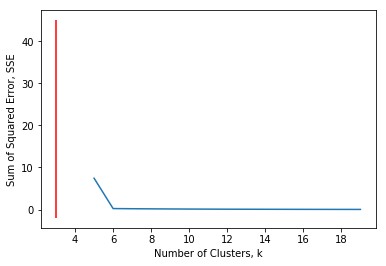

In [188]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE is initialize with empty values
# n_clusters is the "k" 
sse = {}
for n_cluster1 in range(5, 20):
    kmeans1 = KMeans(n_clusters = n_cluster1, max_iter = 500).fit(se_grouped_clustering)
    se_grouped_clustering["clusters"] = kmeans1.labels_
    
    # The inertia is the sum of distances of samples to their closest cluster centre
    sse[n_cluster1] = kmeans1.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters, k")
plt.ylabel("Sum of Squared Error, SSE")
# vertical line
plt.vlines(3, ymin = -2, ymax = 45, colors = 'red')
plt.show()

In [189]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(5, 20):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(se_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(se_grouped_clustering, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))

Where n_clusters = 5, the Silhouette Coefficient is 0.5665270579336791
Where n_clusters = 6, the Silhouette Coefficient is 0.5569291568810677
Where n_clusters = 7, the Silhouette Coefficient is 0.554818163619013
Where n_clusters = 8, the Silhouette Coefficient is 0.5778078432280216
Where n_clusters = 9, the Silhouette Coefficient is 0.5821475416381453
Where n_clusters = 10, the Silhouette Coefficient is 0.6133927503076371
Where n_clusters = 11, the Silhouette Coefficient is 0.6331083940060145
Where n_clusters = 12, the Silhouette Coefficient is 0.6682359143194335
Where n_clusters = 13, the Silhouette Coefficient is 0.7178009243049221
Where n_clusters = 14, the Silhouette Coefficient is 0.77079136589958
Where n_clusters = 15, the Silhouette Coefficient is 0.8196701554482907
Where n_clusters = 16, the Silhouette Coefficient is 0.8434283175150885
Where n_clusters = 17, the Silhouette Coefficient is 0.8430629348307725
Where n_clusters = 18, the Silhouette Coefficient is 0.8668210968975704


In [190]:
se_clusters.columns

Index(['Location', 'Borough', 'Postcode', 'Latitude', 'Longitude',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       ...
       '91th Most Common Venue', '92th Most Common Venue',
       '93th Most Common Venue', '94th Most Common Venue',
       '95th Most Common Venue', '96th Most Common Venue',
       '97th Most Common Venue', '98th Most Common Venue',
       '99th Most Common Venue', '100th Most Common Venue'],
      dtype='object', length=106)

In [191]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(se_clusters['Latitude'], se_clusters['Longitude'], se_clusters['Location'], se_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

In [192]:
se_clusters.loc[se_clusters['Cluster Labels'] == 0, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue,51th Most Common Venue,52th Most Common Venue,53th Most Common Venue,54th Most Common Venue,55th Most Common Venue,56th Most Common Venue,57th Most Common Venue,58th Most Common Venue,59th Most Common Venue,60th Most Common Venue,61th Most Common Venue,62th Most Common Venue,63th Most Common Venue,64th Most Common Venue,65th Most Common Venue,66th Most Common Venue,67th Most Common Venue,68th Most Common Venue,69th Most Common Venue,70th Most Common Venue,71th Most Common Venue,72th Most Common Venue,73th Most Common Venue,74th Most Common Venue,75th Most Common Venue,76th Most Common Venue,77th Most Common Venue,78th Most Common Venue,79th Most Common Venue,80th Most Common Venue,81th Most Common Venue,82th Most Common Venue,83th Most Common Venue,84th Most Common Venue,85th Most Common Venue,86th Most Common Venue,87th Most Common Venue,88th Most Common Venue,89th Most Common Venue,90th Most Common Venue,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
29,Croydon,0,Pub,Grocery Store,Supermarket,Tram Station,Café,Coffee Shop,Park,Platform,Train Station,Indian Restaurant,Lake,Pharmacy,Office,Music Store,Mini Golf,Mediterranean Restaurant,Gym Pool,Hotel,Hardware Store,Soccer Stadium,Gym / Fitness Center,Golf Course,Gas Station,Clothing Store,Caribbean Restaurant,Breakfast Spot,Sandwich Place,African Restaurant,Track Stadium,Sporting Goods Shop,English Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Flower Shop,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant,Distillery,Discount Store,Diner,Dim Sum Restaurant,Flea Market,Food & Drink Shop,Greek Restaurant,Food Court,Vegetarian / Vegan Restaurant,Go Kart Track,Gift Shop,General Entertainment,Gay Bar,Gastropub,Vietnamese Restaurant,Garden Center,Garden,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Forest,Food Truck,Food Stand,Dessert Shop,Deli / Bodega,Dance Studio,Bookstore,Bike Shop,Beer Store,Beer Garden,Beer Bar,Bar,Bakery,BBQ Joint,Australian Restaurant,Athletics & Sports,Asian Restaurant,Arts & Crafts Store,Art Museum,Art Gallery,Argentinian Restaurant,Aquarium,Antique Shop,American Restaurant,Bistro,Brazilian Restaurant,Cupcake Shop,Xinjiang Restaurant,Cricket Ground,Creperie,Convenience Store,Concert Hall,Community Center,Warehouse Store
31,Croydon,0,Pub,Grocery Store,Supermarket,Tram Station,Café,Coffee Shop,Park,Platform,Train Station,Indian Restaurant,Lake,Pharmacy,Office,Music Store,Mini Golf,Mediterranean Restaurant,Gym Pool,Hotel,Hardware Store,Soccer Stadium,Gym / Fitness Cen

In [193]:
se_clusters.loc[se_clusters['Cluster Labels'] == 1, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue,51th Most Common Venue,52th Most Common Venue,53th Most Common Venue,54th Most Common Venue,55th Most Common Venue,56th Most Common Venue,57th Most Common Venue,58th Most Common Venue,59th Most Common Venue,60th Most Common Venue,61th Most Common Venue,62th Most Common Venue,63th Most Common Venue,64th Most Common Venue,65th Most Common Venue,66th Most Common Venue,67th Most Common Venue,68th Most Common Venue,69th Most Common Venue,70th Most Common Venue,71th Most Common Venue,72th Most Common Venue,73th Most Common Venue,74th Most Common Venue,75th Most Common Venue,76th Most Common Venue,77th Most Common Venue,78th Most Common Venue,79th Most Common Venue,80th Most Common Venue,81th Most Common Venue,82th Most Common Venue,83th Most Common Venue,84th Most Common Venue,85th Most Common Venue,86th Most Common Venue,87th Most Common Venue,88th Most Common Venue,89th Most Common Venue,90th Most Common Venue,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
0,Lewisham,1,Coffee Shop,Pub,Café,Park,Bar,Gastropub,Italian Restaurant,Cocktail Bar,Indian Restaurant,Turkish Restaurant,Food Truck,Brewery,Fish & Chips Shop,Bakery,Restaurant,Hotel,Beer Store,Gym / Fitness Center,Supermarket,Pizza Place,Sandwich Place,Grocery Store,Gourmet Shop,Concert Hall,Performing Arts Venue,Pet Store,Garden Center,Hungarian Restaurant,Pakistani Restaurant,Farmers Market,Indie Movie Theater,Mediterranean Restaurant,Malay Restaurant,French Restaurant,Scenic Lookout,Deli / Bodega,Vegetarian / Vegan Restaurant,Breakfast Spot,Athletics & Sports,Train Station,Street Food Gathering,Sri Lankan Restaurant,Speakeasy,Theater,Burger Joint,Go Kart Track,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Australian Restaurant,Food Court,American Restaurant,Food Stand,Asian Restaurant,Forest,Greek Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Golf Course,Gaming Cafe,Arts & Crafts Store,Garden,BBQ Joint,Gas Station,Art Museum,Art Gallery,Gay Bar,Antique Shop,General Entertainment,Argentinian Restaurant,Aquarium,Gift Shop,Caribbean Restaurant,Falafel Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Chinese Restaurant,Bus Stop,Climbing Gym,Clothing Store,Building,Community Center,Brazilian Restaurant,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Bookstore,Dessert Shop,Bistro,Farm,Diner,Discount Store,Distillery,Doner Restaurant,Bike Shop,Beer Garden
2,Lewisham,1,Pub,Café,Coffee Shop,Park,Bar,Garden,Indian Restaurant,Indie Movie Theater,Sandwich Place,Brewery,Deli / Bodega,Market,Italian Restaurant,Cocktail Bar,Turkish Restaurant,Trail,Grocery Store,History Museum,Vietnamese Restaurant,Histori

In [194]:
se_clusters.loc[se_clusters['Cluster Labels'] == 2, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue,51th Most Common Venue,52th Most Common Venue,53th Most Common Venue,54th Most Common Venue,55th Most Common Venue,56th Most Common Venue,57th Most Common Venue,58th Most Common Venue,59th Most Common Venue,60th Most Common Venue,61th Most Common Venue,62th Most Common Venue,63th Most Common Venue,64th Most Common Venue,65th Most Common Venue,66th Most Common Venue,67th Most Common Venue,68th Most Common Venue,69th Most Common Venue,70th Most Common Venue,71th Most Common Venue,72th Most Common Venue,73th Most Common Venue,74th Most Common Venue,75th Most Common Venue,76th Most Common Venue,77th Most Common Venue,78th Most Common Venue,79th Most Common Venue,80th Most Common Venue,81th Most Common Venue,82th Most Common Venue,83th Most Common Venue,84th Most Common Venue,85th Most Common Venue,86th Most Common Venue,87th Most Common Venue,88th Most Common Venue,89th Most Common Venue,90th Most Common Venue,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
1,Southwark,2,Café,Coffee Shop,Park,Pub,Italian Restaurant,Middle Eastern Restaurant,Cocktail Bar,Grocery Store,Indian Restaurant,Beer Bar,Pizza Place,Bar,Burger Joint,Falafel Restaurant,Brewery,Cricket Ground,Market,Gastropub,Music Venue,Okonomiyaki Restaurant,Kebab Restaurant,General Entertainment,Pie Shop,Yoga Studio,Gym / Fitness Center,Plaza,Greek Restaurant,Farmers Market,Gay Bar,Convenience Store,Art Gallery,Bakery,Beer Store,Bike Shop,Caribbean Restaurant,Community Center,Creperie,Gaming Cafe,Dance Studio,Deli / Bodega,Ethiopian Restaurant,Record Shop,Fish & Chips Shop,Food Court,Ramen Restaurant,African Restaurant,Restaurant,Vietnamese Restaurant,Supermarket,Tapas Restaurant,Xinjiang Restaurant,Turkish Restaurant,Dumpling Restaurant,Event Space,English Restaurant,Empanada Restaurant,Eastern European Restaurant,Doner Restaurant,Farm,Distillery,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop,Thai Restaurant,Theater,Taco Place,Fast Food Restaurant,Sushi Restaurant,Forest,Garden,Street Art,Furniture / Home Store,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Food Truck,Thrift / Vintage Store,Food Stand,Street Food Gathering,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Cupcake Shop,Recreation Center,Tourist Information Center,Athletics & Sports,Beer Garden,Windmill,Wine Bar,Wine Shop,BBQ Joint,Australian Restaurant,Asian Restaurant,Bistro,Arts & Crafts Store,Art Museum,Argentinian Restaurant,Aquarium
4,Southwark,2,Pizza Place,Café,Park,Pub,Italian Restaurant,Garden Center,Forest,Coffee Shop,Cocktail Bar,Mediterranean Restaurant,Restaurant,Burger Joint,Brewery,Gaming Cafe,Indian Restaurant,Chinese Restaurant,Market,Scenic Lo

In [195]:
se_clusters.loc[se_clusters['Cluster Labels'] == 3, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue,51th Most Common Venue,52th Most Common Venue,53th Most Common Venue,54th Most Common Venue,55th Most Common Venue,56th Most Common Venue,57th Most Common Venue,58th Most Common Venue,59th Most Common Venue,60th Most Common Venue,61th Most Common Venue,62th Most Common Venue,63th Most Common Venue,64th Most Common Venue,65th Most Common Venue,66th Most Common Venue,67th Most Common Venue,68th Most Common Venue,69th Most Common Venue,70th Most Common Venue,71th Most Common Venue,72th Most Common Venue,73th Most Common Venue,74th Most Common Venue,75th Most Common Venue,76th Most Common Venue,77th Most Common Venue,78th Most Common Venue,79th Most Common Venue,80th Most Common Venue,81th Most Common Venue,82th Most Common Venue,83th Most Common Venue,84th Most Common Venue,85th Most Common Venue,86th Most Common Venue,87th Most Common Venue,88th Most Common Venue,89th Most Common Venue,90th Most Common Venue,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
5,Southwark,3,Café,Coffee Shop,Pub,Hotel,Park,Theater,Italian Restaurant,Street Food Gathering,Beer Bar,Scenic Lookout,Grocery Store,Pizza Place,Brewery,Cocktail Bar,Performing Arts Venue,Garden,Gay Bar,Art Gallery,Cricket Ground,Tapas Restaurant,Seafood Restaurant,Gym,Indian Restaurant,Korean Restaurant,Sandwich Place,History Museum,Museum,Music Venue,Plaza,Peruvian Restaurant,Skate Park,Farmers Market,French Restaurant,Art Museum,Bakery,Eastern European Restaurant,Dance Studio,Thai Restaurant,Convenience Store,Modern European Restaurant,Arts & Crafts Store,Bar,Bike Shop,Cheese Shop,Concert Hall,Movie Theater,Cupcake Shop,Food Stand,Indie Theater,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farm,Food & Drink Shop,Gastropub,Pie Shop,African Restaurant,Portuguese Restaurant,Wine Bar,Shoe Store,Street Art,Climbing Gym,Monument / Landmark,Historic Site,Trail,Yoga Studio,Indie Movie Theater,Roof Deck,Japanese Restaurant,Gym / Fitness Center,Dessert Shop,Turkish Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Athletics & Sports,Xinjiang Restaurant,Antique Shop,Salad Place,English Restaurant,Doner Restaurant,Taco Place,Flea Market,Fish Market,Fish & Chips Shop,Creperie,Tourist Information Center,Thrift / Vintage Store,Dumpling Restaurant,Fast Food Restaurant,Sporting Goods Shop,Toy / Game Store,Deli / Bodega,Sushi Restaurant,Sri Lankan Restaurant,Dim Sum Restaurant,Stadium,Diner,Discount Store,Event Space,Distillery
6,Southwark,3,Café,Coffee Shop,Pub,Hotel,Park,Theater,Italian Restaurant,Street Food Gathering,Beer Bar,Scenic Lookout,Grocery Store,Pizza Place,Brewery,Cocktail Bar,Performing Arts Venue,Garden,Gay Bar,Art Gallery,Cricke

In [196]:
se_clusters.loc[se_clusters['Cluster Labels'] == 4, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue,51th Most Common Venue,52th Most Common Venue,53th Most Common Venue,54th Most Common Venue,55th Most Common Venue,56th Most Common Venue,57th Most Common Venue,58th Most Common Venue,59th Most Common Venue,60th Most Common Venue,61th Most Common Venue,62th Most Common Venue,63th Most Common Venue,64th Most Common Venue,65th Most Common Venue,66th Most Common Venue,67th Most Common Venue,68th Most Common Venue,69th Most Common Venue,70th Most Common Venue,71th Most Common Venue,72th Most Common Venue,73th Most Common Venue,74th Most Common Venue,75th Most Common Venue,76th Most Common Venue,77th Most Common Venue,78th Most Common Venue,79th Most Common Venue,80th Most Common Venue,81th Most Common Venue,82th Most Common Venue,83th Most Common Venue,84th Most Common Venue,85th Most Common Venue,86th Most Common Venue,87th Most Common Venue,88th Most Common Venue,89th Most Common Venue,90th Most Common Venue,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
12,Lewisham,4,Grocery Store,Pub,Park,Café,Gym / Fitness Center,Italian Restaurant,Train Station,Soccer Field,Coffee Shop,Supermarket,Fast Food Restaurant,Platform,Concert Hall,Convenience Store,Indian Restaurant,Pizza Place,Fish & Chips Shop,Nature Preserve,Flower Shop,Fried Chicken Joint,Gastropub,Gym,Social Club,Hostel,Track,Brazilian Restaurant,Food Court,Furniture / Home Store,Fruit & Vegetable Store,Art Museum,French Restaurant,Forest,Food Truck,Food Stand,Food & Drink Shop,BBQ Joint,Arts & Crafts Store,Asian Restaurant,Flea Market,Fish Market,Athletics & Sports,Australian Restaurant,Farmers Market,Gaming Cafe,Garden,Garden Center,Greek Restaurant,Himalayan Restaurant,Hardware Store,Harbor / Marina,Gym Pool,American Restaurant,Antique Shop,Aquarium,Gourmet Shop,Gas Station,Argentinian Restaurant,Golf Course,Go Kart Track,Gift Shop,General Entertainment,Gay Bar,Art Gallery,Farm,Falafel Restaurant,Breakfast Spot,Cheese Shop,Beer Garden,Community Center,Beer Store,Cocktail Bar,Clothing Store,Climbing Gym,Chinese Restaurant,Caribbean Restaurant,Event Space,Bike Shop,Bistro,Bookstore,Bus Stop,Burger Joint,Building,Brewery,Beer Bar,Creperie,Cricket Ground,Cupcake Shop,Ethiopian Restaurant,English Restaurant,Empanada Restaurant,Eastern European Restaurant,Dumpling Restaurant,Bakery,Doner Restaurant,Distillery,Discount Store,Historic Site,Bar,Dim Sum Restaurant,Dessert Shop
19,Lewisham,4,Grocery Store,Pub,Park,Café,Gym / Fitness Center,Italian Restaurant,Train Station,Soccer Field,Coffee Shop,Supermarket,Fast Food Restaurant,Platform,Concert Hall,Convenience Store,Indian Restaurant,Pizza Place,Fish & Chips Shop,Nature Preserve,Flower Shop,Fried Chicken Joint,

Summary of the clusters:

Coffee Shops,Cafffeterias and Pubs are widely situated in the corresponding area.
Among the  restaurants, south Indian Restaurants are highly demanded in the South East London area. 


Conclusion

From the clusters it is clear that 1 and 4th will be the popular destination or reachout to build up a convenient south indian restaurant with all the amenities nearby. Another advantage is that they dont have enough competitors to hinder their growth phase if one is started.  

Also the living standards are taken in to consideration by getting the Four square data on nearby schools, Hospitals, police station ,other restaurants, emergency services and entertainment points.

Also the various cluster shows the in demand outcome of upcoming food corners in the said radius of 10 km. The resulted data driven shows it as an exact location for fruitful business.


